 # THE SPARK FOUNDATION: DATA SCIENCE AND BUSINESS INTELLIGENCE INTERNSHIP AUG-2024                                             


## CREATED BY: SYED HAMMAD JAVED

  ### TASK NO: 07 STOCK MARKET PREDICTION USING NUMERICAL AND TEXTUAL DATASET

Importing Required Libraries

Purpose: Import necessary libraries for data manipulation, visualization, sentiment analysis, machine learning models, and deep learning models.

In [2]:
import pandas as pd 
import numpy as np
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns 
from textblob import  TextBlob
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from keras.layers import LSTM, Dense
from keras.models import Sequential
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import datetime
import re
import math
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)


Loading and Exploring Stock Prices Dataset

Purpose: Load the stock prices dataset and inspect the first few rows.

In [3]:
stockprice_dataset = pd.read_csv('stockprices.csv')
stockprice_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/03/2017,26.010000,26.379999,25.860001,25.900000,24.324486,55900
1,02/03/2017,25.830000,25.920000,25.660000,25.770000,24.202393,41800
2,03/03/2017,25.780001,26.070000,25.459999,25.780001,24.211786,70400
3,06/03/2017,25.680000,25.889999,25.440001,25.830000,24.258745,42600
4,07/03/2017,25.700001,25.879999,25.549999,25.840000,24.268139,45600


Purpose: Check the dimensions of the dataset.

In [4]:
stockprice_dataset.shape

(1258, 7)

Purpose: Check the data types of each column.

In [5]:
stockprice_dataset.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Purpose: Generate summary statistics for the numerical columns in the dataset.

In [6]:
stockprice_dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,27.440541,27.815517,27.082424,27.435191,26.670349,116850.158983
std,9.848524,9.992097,9.729114,9.854475,10.042969,80865.954108
min,14.040000,14.320000,13.540000,13.800000,13.456052,11700.000000
25%,20.920000,21.240000,20.602500,20.930000,20.284237,68050.000000
50%,25.135000,25.360001,24.910000,25.150000,23.947571,93950.000000
75%,28.577500,28.982500,28.315000,28.702499,28.275214,141200.000000
max,65.910004,66.330002,64.830002,65.910004,65.757668,846900.000000


 Loading and Exploring News Headlines Dataset

Purpose: Load the news headlines dataset and inspect the first few rows.

In [7]:
news_dataset= pd.read_csv('indian_news_headlines.csv')
news_dataset.head()

,Date,Category,News
0,20170101,life-style.beauty,Look-ing ahead
1,20170101,life-style.health-fitness.weight-loss,Genie in a diet
2,20170101,life-style.health-fitness.de-stress,17 ideas for 2017
3,20170101,life-style.health-fitness.de-stress,I started living my life to my highest potenti...
4,20170101,life-style.home-garden,Hygge up your home


Purpose: Check the dimensions of the news dataset.

In [8]:
news_dataset.shape

(873615, 3)

Purpose: Get a concise summary of the dataset, including the data types and non-null values.

In [9]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873615 entries, 0 to 873614
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Date      873615 non-null  int64 
 1   Category  873615 non-null  object
 2   News      873615 non-null  object
dtypes: int64(1), object(2)
memory usage: 20.0+ MB


Data Cleaning and Preprocessing

Purpose: Remove rows with missing values and duplicate entries based on the Date column, then reset the index.

In [10]:
news_dataset.dropna(axis=0, how='any')
news_dataset= news_dataset.drop_duplicates('Date', keep='first').sort_index()
news_dataset= news_dataset.reset_index()
news_dataset

,index,Date,Category,News
0,0,20170101,life-style.beauty,Look-ing ahead
1,84,20170102,life-style.health-fitness.de-stress,Destress plan for the first Monday of 2017
2,784,20170103,city.bareilly,State opposition dismisses Samajwadi Party feu...
3,1483,20170104,tv.news.hindi,Rudra Soni ready to go bald for TV; not Bollyw...
4,2183,20170105,life-style.home-garden,Decoding Buddhist prayer flags
...,...,...,...,...
1456,871121,20201227,entertainment.bengali.movies.news,#BigInterview! Dhritiman Chatterjee: Nobody da...
1457,871620,20201228,astrology.horoscope,Horoscope Today; 28 December 2020: Check astro...
1458,872118,20201229,city.bareilly,Man recovers charred remains of 'thief' from h...
1459,872617,20201230,astrology.numerology-tarot,Numerology Readings 30 December 2020: Predicti...


Purpose: Convert the Date columns in both datasets to datetime format.

In [11]:
stockprice_dataset['Date']= pd.to_datetime(stockprice_dataset['Date'],format="%d/%m/%Y")
news_dataset['Date']= pd.to_datetime(news_dataset['Date'], format = "%Y%m%d")


Extracting and Processing City Data from News Headlines

Purpose: Filter the news dataset to extract entries related to cities.

In [12]:
citydata = news_dataset[news_dataset['Category'].str.contains('^city.[a-z, A-Z]+$', regex=True)]
citydata

,index,Date,Category,News
2,784,2017-01-03,city.bareilly,State opposition dismisses Samajwadi Party feu...
5,2883,2017-01-06,city.bareilly,Will stay bachelor to serve Akhilesh; says thr...
6,3582,2017-01-07,city.mysuru,Helpdesk to aid bizmen get Udyog Aadhaar Memor...
9,5682,2017-01-10,city.lucknow,Mulayam Singh calls off January 5 convention
12,7782,2017-01-13,city.kochi,Vidya Balan opts out of biopic on Madhavikutty
...,...,...,...,...
1444,865132,2020-12-15,city.nagpur,1;147 RT-PCR tests in a day; only 3 found +ve ...
1447,866631,2020-12-18,city.ahmedabad,Cops; panch witnesses sniffed suspects' mouths...
1448,867130,2020-12-19,city.mumbai,Rally champion only crowned if half WRC season...
1452,869128,2020-12-23,city.vadodara,Sawmill in Makarpura GIDC gutted; none hurt


Purpose: Extract the city name from the Category column and clean up the dataframe.

In [13]:
Data_split = pd.DataFrame(columns=['City_Name'])
Data_split['City_Name']= citydata.Category.str.split('.', expand=True)[1]
citydata = pd.concat([citydata,Data_split],axis=1)
citydata.drop(columns=['Category'],axis=1, inplace=True)
citydata.reset_index(inplace=True)
citydata.drop(['level_0','index'],axis=1, inplace=True)
citydata

,Date,News,City_Name
0,2017-01-03,State opposition dismisses Samajwadi Party feu...,bareilly
1,2017-01-06,Will stay bachelor to serve Akhilesh; says thr...,bareilly
2,2017-01-07,Helpdesk to aid bizmen get Udyog Aadhaar Memor...,mysuru
3,2017-01-10,Mulayam Singh calls off January 5 convention,lucknow
4,2017-01-13,Vidya Balan opts out of biopic on Madhavikutty,kochi
...,...,...,...
621,2020-12-15,1;147 RT-PCR tests in a day; only 3 found +ve ...,nagpur
622,2020-12-18,Cops; panch witnesses sniffed suspects' mouths...,ahmedabad
623,2020-12-19,Rally champion only crowned if half WRC season...,mumbai
624,2020-12-23,Sawmill in Makarpura GIDC gutted; none hurt,vadodara


 Visualizing Stock Prices Data

Purpose: Plot the high and low prices over time.

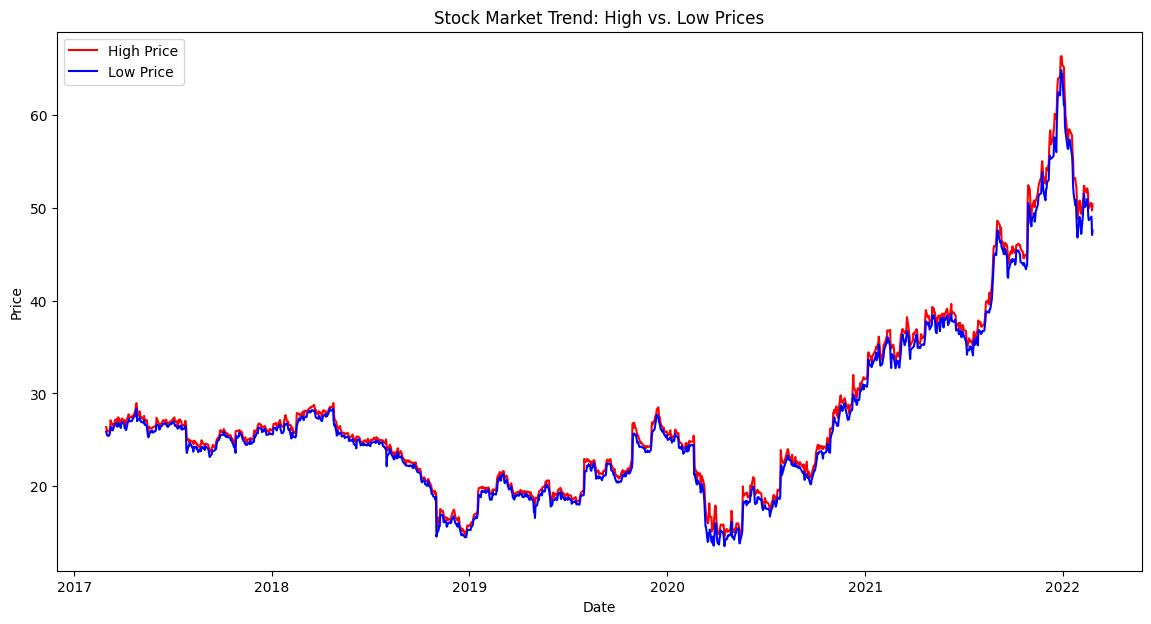

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(stockprice_dataset['Date'], stockprice_dataset['High'], label='High Price', color='red')
plt.plot(stockprice_dataset['Date'], stockprice_dataset['Low'], label='Low Price', color='blue')
plt.title('Stock Market Trend: High vs. Low Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(False)
plt.show()

Purpose: Plot the opening prices over time.

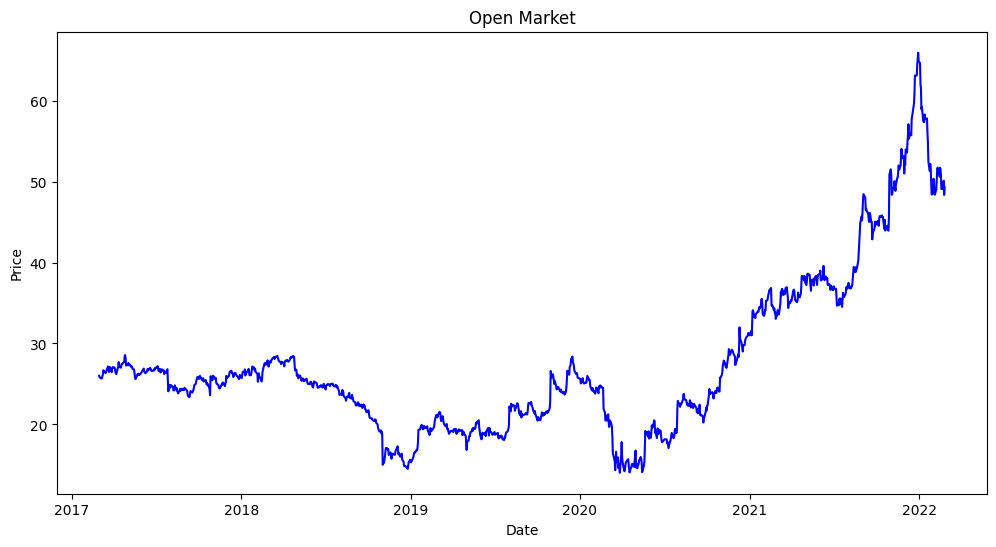

In [15]:
plt.figure(figsize=(12,6))
plt.plot(stockprice_dataset['Date'], stockprice_dataset['Open'], label='Open', color='blue')
plt.title('Open Market')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Purpose: Plot the closing prices over time.

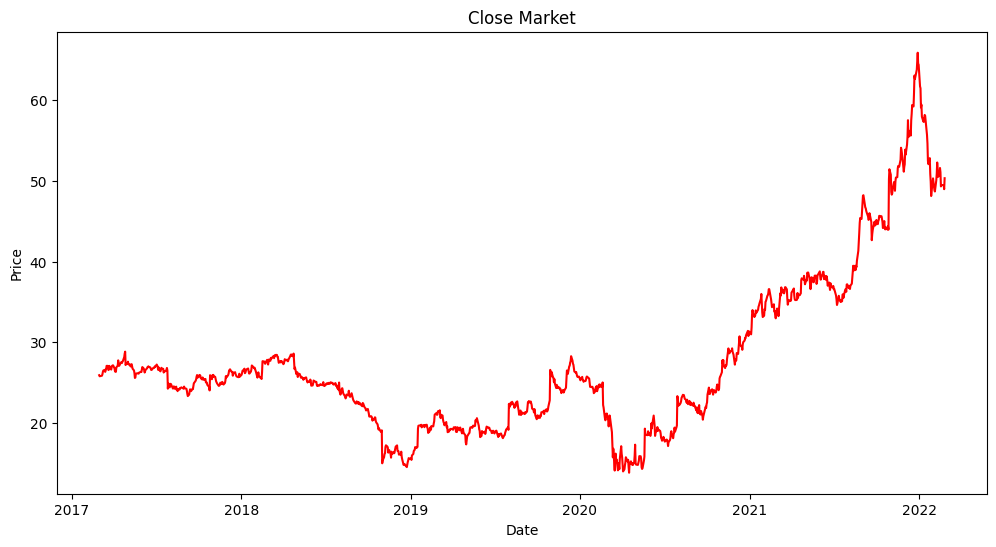

In [16]:
plt.figure(figsize=(12,6))
plt.plot(stockprice_dataset['Date'], stockprice_dataset['Close'], label='Close', color='red')
plt.title('Close Market')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

 Creating Sequences for Time Series Prediction

Purpose: Create sequences of data for time series prediction. This is essential for training the LSTM model.

In [17]:
def create_sequences(data, look_back=1):
    sequences_x, sequences_y = [], []

    for i in range(len(data) - look_back):
       
        sequence = data[i:(i + look_back), 0]
        sequences_x.append(sequence)
        
        target_value = data[i + look_back, 0]
        sequences_y.append(target_value)
    
    return np.array(sequences_x), np.array(sequences_y)
file_path = 'stockprices.csv'
column_index = 5  
data= pd.read_csv(file_path, usecols=[column_index], engine='python')


data.dropna(inplace=True)

data_array = data.values.astype('float32')

look_back_period = 1
X, y = create_sequences(data_array, look_back=look_back_period)

print(f"Input sequences shape: {X.shape}")
print(f"Target values shape: {y.shape}")

Input sequences shape: (1257, 1)
Target values shape: (1257,)


Scaling and Splitting Data for Training and Testing

Purpose: Scale the data and split it into training and testing sets. Prepare the data for LSTM model input.

In [18]:

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data) 

train_size = int(len(scaled_data) * 0.80)
test_size = len(scaled_data) - train_size


train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

look_back = 2
trainX, trainY = create_sequences(train_data, look_back)
testX, testY = create_sequences(test_data, look_back)

trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], 1))
testX = testX.reshape((testX.shape[0], testX.shape[1], 1))

Building and Training LSTM Model

Purpose: Define and train the LSTM model to predict stock prices based on past data sequences

In [19]:
model = Sequential()
model.add(LSTM(7, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=500, batch_size=10, verbose=2)

C:\Users\DELL 6540\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
101/101 - 5s - 51ms/step - loss: 0.0116
Epoch 2/500
101/101 - 0s - 4ms/step - loss: 0.0040
Epoch 3/500
101/101 - 0s - 3ms/step - loss: 0.0030
Epoch 4/500
101/101 - 0s - 3ms/step - loss: 0.0020
Epoch 5/500
101/101 - 0s - 2ms/step - loss: 0.0011
Epoch 6/500
101/101 - 0s - 2ms/step - loss: 4.6774e-04
Epoch 7/500
101/101 - 0s - 2ms/step - loss: 1.9931e-04
Epoch 8/500
101/101 - 0s - 2ms/step - loss: 1.3122e-04
Epoch 9/500
101/101 - 0s - 2ms/step - loss: 1.2223e-04
Epoch 10/500
101/101 - 0s - 3ms/step - loss: 1.1991e-04
Epoch 11/500
101/101 - 0s - 4ms/step - loss: 1.2159e-04
Epoch 12/500
101/101 - 0s - 5ms/step - loss: 1.1906e-04
Epoch 13/500
101/101 - 0s - 4ms/step - loss: 1.2125e-04
Epoch 14/500
101/101 - 0s - 5ms/step - loss: 1.1970e-04
Epoch 15/500
101/101 - 0s - 3ms/step - loss: 1.1952e-04
Epoch 16/500
101/101 - 0s - 2ms/step - loss: 1.2065e-04
Epoch 17/500
101/101 - 0s - 3ms/step - loss: 1.2006e-04
Epoch 18/500
101/101 - 0s - 2ms/step - loss: 1.2171e-04
Epoch 19/500
101/101

Evaluating Model Performance

Purpose: Make predictions on both training and test data, then inverse transform the predictions to original scale.

In [20]:
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [21]:

train_predictions = model.predict(trainX)
test_predictions = model.predict(testX)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [22]:

train_predictions = scaler.inverse_transform(train_predictions)
trainY_inv = scaler.inverse_transform(trainY.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
testY_inv = scaler.inverse_transform(testY.reshape(-1, 1))


Purpose: Calculate and print various performance metrics for the model on both training and test data.

In [23]:
mae_train = mean_absolute_error(trainY_inv, train_predictions)
mse_train = mean_squared_error(trainY_inv, train_predictions)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(trainY_inv, train_predictions)
mae_test = mean_absolute_error(testY_inv, test_predictions)
mse_test = mean_squared_error(testY_inv, test_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(testY_inv, test_predictions)

print(f'Training MAE: {mae_train}')
print(f'Training MSE: {mse_train}')
print(f'Training RMSE: {rmse_train}')
print(f'Training R^2: {r2_train}')

print(f'Test MAE: {mae_test}')
print(f'Test MSE: {mse_test}')
print(f'Test RMSE: {rmse_test}')
print(f'Test R^2: {r2_test}')

Training MAE: 0.31366291754642806
Training MSE: 0.2434202395805943
Training RMSE: 0.49337636706736804
Training R^2: 0.9864796473700594
Test MAE: 1.3458835440859385
Test MSE: 3.899842028590547
Test RMSE: 1.974801769441821
Test R^2: 0.941551450187415


Visualizing Predictions vs Actual Prices

Purpose: Plot the actual vs predicted stock prices for both training and test data.

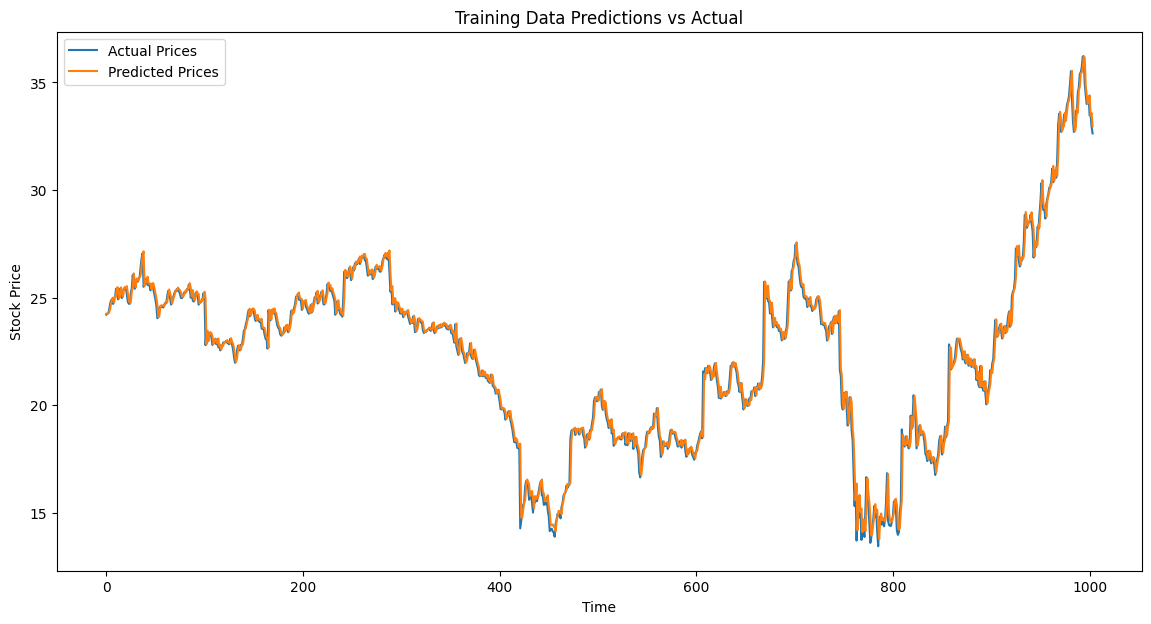

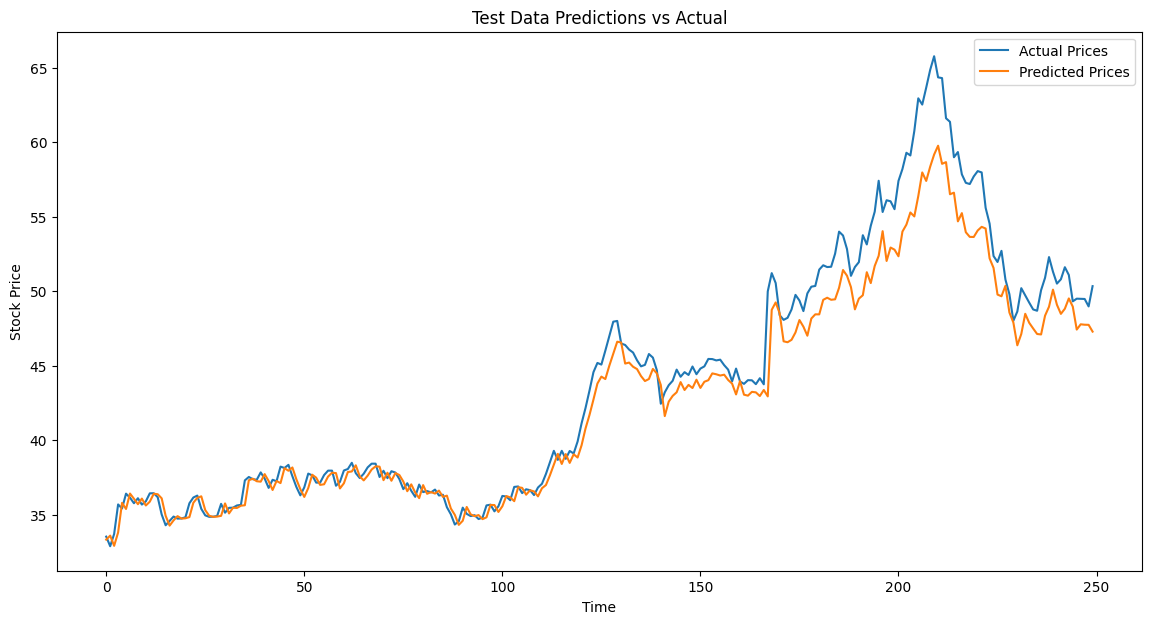

In [24]:
plt.figure(figsize=(14, 7))
plt.plot(trainY_inv, label='Actual Prices')
plt.plot(train_predictions, label='Predicted Prices')
plt.title('Training Data Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(testY_inv, label='Actual Prices')
plt.plot(test_predictions, label='Predicted Prices')
plt.title('Test Data Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

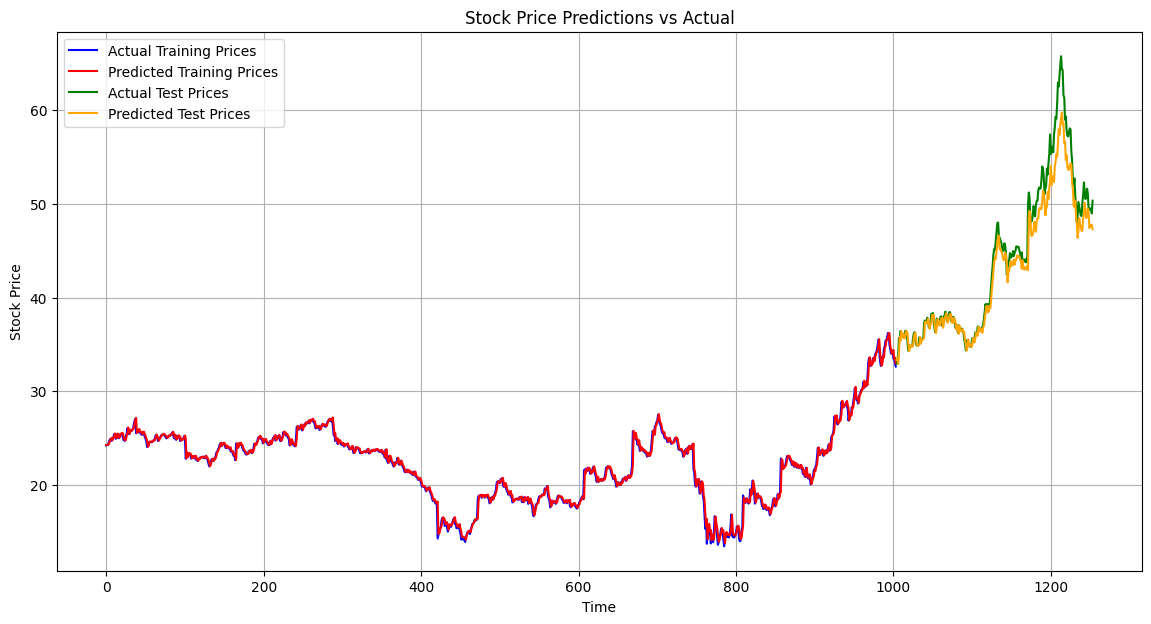

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(trainY_inv, label='Actual Training Prices', color='blue')
plt.plot(train_predictions, label='Predicted Training Prices', color='red')
plt.plot(range(len(trainY_inv), len(trainY_inv) + len(testY_inv)), testY_inv, label='Actual Test Prices', color='green')
plt.plot(range(len(trainY_inv), len(trainY_inv) + len(test_predictions)), test_predictions, label='Predicted Test Prices', color='orange')
plt.title('Stock Price Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


headlines by cities

In [26]:
headline_by_city = citydata.groupby(['City_Name']).agg({'News':'count'})
headline_by_city=headline_by_city.rename(columns={'News':'No_of_headline'},)
headline_by_city = headline_by_city.sort_values(by='No_of_headline',ascending=False)
top_15_headline_by_city = headline_by_city.head(15)
top_15_headline_by_city

,No_of_headline
City_Name,
nagpur,38
bengaluru,33
madurai,31
goa,31
trichy,31
hyderabad,29
patna,27
chennai,27
ahmedabad,25


Plotting the Bar Comparison Chart for Top Cities with Headlines

Purpose: Create a bar chart to visualize the top 15 cities with the highest number of news headlines, with annotations on each bar showing the number of headlines.

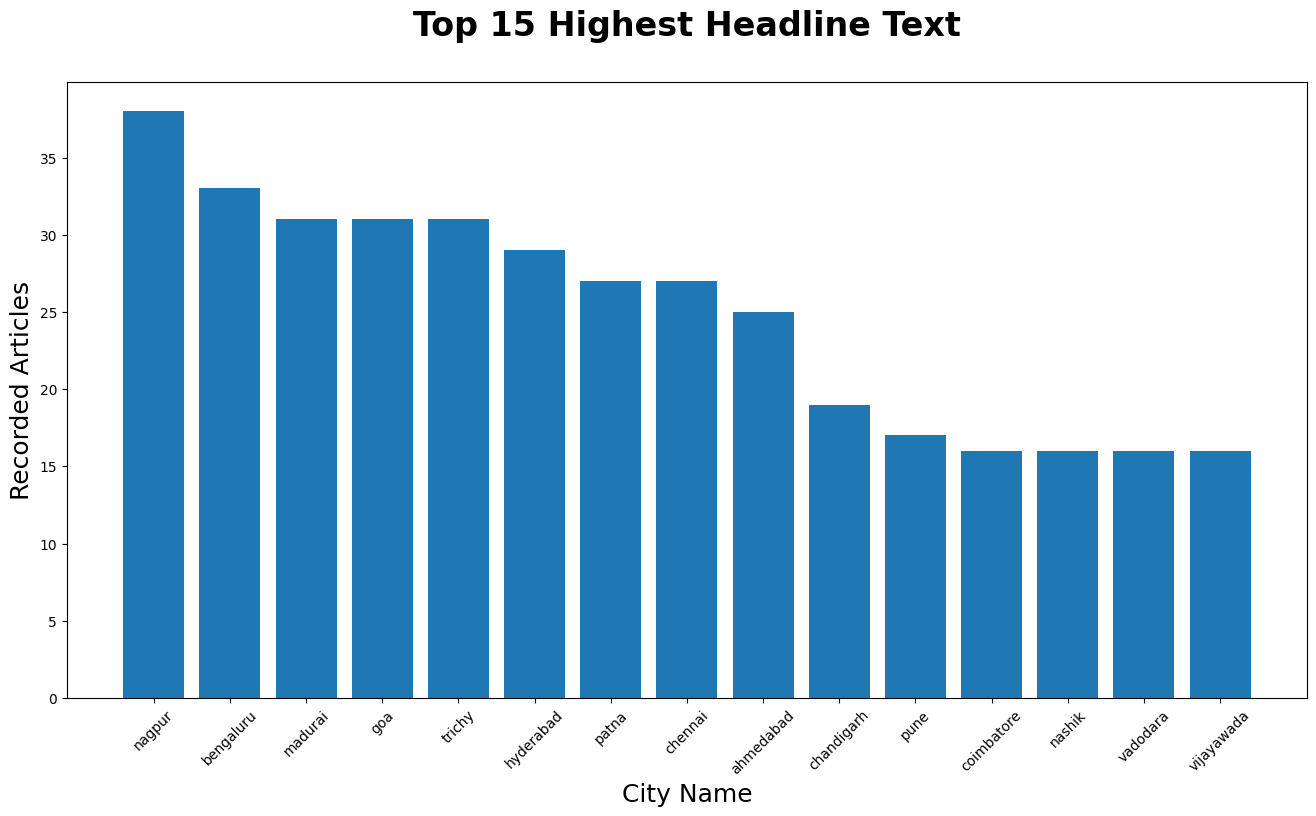

In [27]:
plt.figure(figsize=(16,8))
plt.bar(top_15_headline_by_city.index,height=top_15_headline_by_city['No_of_headline'])
plt.xticks(rotation = 45)
plt.xlabel('City Name',fontsize=18)
plt.ylabel('Recorded Articles',fontsize=18)
plt.title('Top 15 Highest Headline Text\n',fontsize=24, fontweight='bold')
plt.show()

Define Function for Sentiment Analysis Polarity

Purpose: Create a function to categorize news headlines into 'negative,' 'neutral,' or 'positive' based on their sentiment polarity using TextBlob.

In [28]:
def getAnalysis_polarity(headline):
    result = TextBlob(headline)
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

Apply Sentiment Polarity Function to News Data

Purpose: Apply the sentiment polarity function to each news headline in the dataset and store the results in a new column called Result.

In [29]:
news_dataset['Result'] = np.array([getAnalysis_polarity(headline) for headline in news_dataset['News']])

Aggregate Sentiment Results

Purpose: Group the news headlines by their sentiment category and count the number of headlines in each category.

In [30]:
final_result = news_dataset.groupby(['Result']).agg({'News':'count'})
final_result

,News
Result,
negative,176
neutral,848
positive,437


Visualize Sentiment Distribution with a Pie Chart

Purpose: Create a pie chart to visualize the distribution of sentiment categories (positive, neutral, negative) in the news headlines.

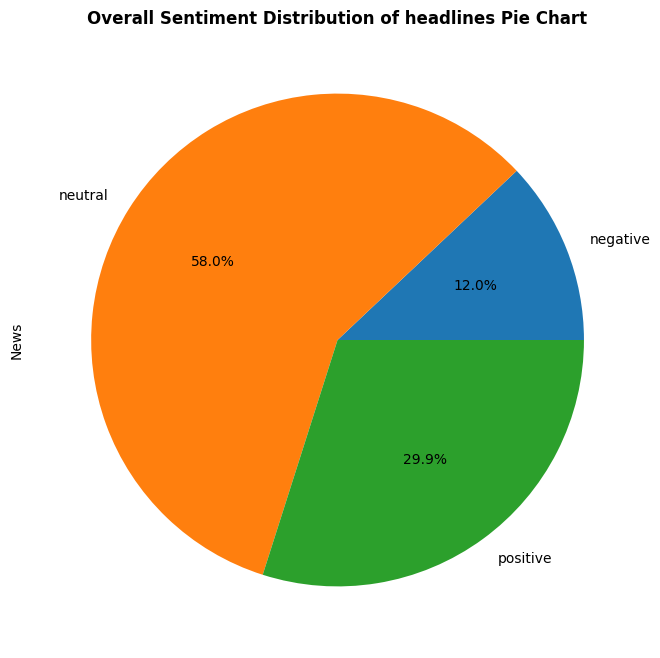

In [31]:
plt.figure(figsize=(16,8))
final_result['News'].plot.pie(autopct='%1.1f%%')
plt.title("Overall Sentiment Distribution of headlines Pie Chart",fontweight="bold")
plt.show()

Load Stock Prices and News Data

Purpose: Load the stock prices and news headlines datasets into pandas DataFrames for further analysis.

In [32]:
stockprice_dataset= pd.read_csv('stockprices.csv')
news_dataset= pd.read_csv('indian_news_headlines.csv')

Convert Date Columns to Datetime Format

Purpose: Convert the Date columns in both datasets to a standardized datetime format for proper merging.

In [33]:
stockprice_dataset['Date']= pd.to_datetime(stockprice_dataset['Date'], format="%d/%m/%Y")
news_dataset['Date']= pd.to_datetime(news_dataset['Date'], format= '%Y%m%d')

 Merge Stock Prices with News Data

Purpose: Merge the stock prices dataset with the news headlines dataset based on the Date column to create a hybrid dataset for further analysis.

In [34]:
hybrid_dataset= pd.merge(stockprice_dataset, news_dataset, how='inner', on= 'Date')
hybrid_dataset

,Date,Open,High,Low,Close,Adj Close,Volume,Category,News
0,2017-03-01,26.01,26.379999,25.860001,25.90,24.324486,55900,life-style.relationships.man-woman,Beginner's guide to rocking sex
1,2017-03-01,26.01,26.379999,25.860001,25.90,24.324486,55900,city.indore,With only 58 PUC centres; Indore fails to curb...
2,2017-03-01,26.01,26.379999,25.860001,25.90,24.324486,55900,entertainment.hindi.bollywood,You can't miss Sonakshi Sinha's underwater pic...
3,2017-03-01,26.01,26.379999,25.860001,25.90,24.324486,55900,entertainment.tamil.movies.news,Cheran and Vijay Sethupathi to team up?
4,2017-03-01,26.01,26.379999,25.860001,25.90,24.324486,55900,entertainment.tamil.movies.news,Sonia Aggarwal to play a cop in her next
...,...,...,...,...,...,...,...,...,...
575066,2020-12-31,31.00,31.540001,30.910000,31.32,30.921082,53200,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
575067,2020-12-31,31.00,31.540001,30.910000,31.32,30.921082,53200,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
575068,2020-12-31,31.00,31.540001,30.910000,31.32,30.921082,53200,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
575069,2020-12-31,31.00,31.540001,30.910000,31.32,30.921082,53200,removed,Govt extends deadline for use of FASTag till F...


In [35]:
def analysis_polarity(headline):
    result = TextBlob(headline)
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

 Apply Sentiment Polarity Function to Hybrid Dataset

Purpose: Apply the previously defined sentiment polarity function to the News column in the hybrid dataset and store the results in a new column sentiment.

In [36]:
hybrid_dataset['sentiment'] = np.array([analysis_polarity(headline) for headline in hybrid_dataset['News']])

Convert Sentiment Categories to Dummy Variables

Purpose: Convert the categorical sentiment data into dummy variables and concatenate them with the hybrid dataset.

In [37]:
sentiment_data = pd.get_dummies(hybrid_dataset['sentiment'],drop_first=True)
hybrid_dataset = pd.concat([hybrid_dataset,sentiment_data],axis=1)
hybrid_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Category,News,sentiment,neutral,positive
0,2017-03-01,26.01,26.379999,25.860001,25.9,24.324486,55900,life-style.relationships.man-woman,Beginner's guide to rocking sex,neutral,True,False
1,2017-03-01,26.01,26.379999,25.860001,25.9,24.324486,55900,city.indore,With only 58 PUC centres; Indore fails to curb...,negative,False,False
2,2017-03-01,26.01,26.379999,25.860001,25.9,24.324486,55900,entertainment.hindi.bollywood,You can't miss Sonakshi Sinha's underwater pic...,neutral,True,False
3,2017-03-01,26.01,26.379999,25.860001,25.9,24.324486,55900,entertainment.tamil.movies.news,Cheran and Vijay Sethupathi to team up?,neutral,True,False
4,2017-03-01,26.01,26.379999,25.860001,25.9,24.324486,55900,entertainment.tamil.movies.news,Sonia Aggarwal to play a cop in her next,neutral,True,False


Define Functions to Calculate Subjectivity and Polarity


Purpose: Create functions to calculate the subjectivity and polarity of news headlines using TextBlob.

In [38]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [39]:
hybrid_dataset['Subjectivity'] =hybrid_dataset['News'].apply(getSubjectivity)
hybrid_dataset['Polarity'] = hybrid_dataset['News'].apply(getPolarity)
hybrid_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Category,News,sentiment,neutral,positive,Subjectivity,Polarity
0,2017-03-01,26.01,26.379999,25.860001,25.9,24.324486,55900,life-style.relationships.man-woman,Beginner's guide to rocking sex,neutral,True,False,0.00,0.00
1,2017-03-01,26.01,26.379999,25.860001,25.9,24.324486,55900,city.indore,With only 58 PUC centres; Indore fails to curb...,negative,False,False,0.65,-0.25
2,2017-03-01,26.01,26.379999,25.860001,25.9,24.324486,55900,entertainment.hindi.bollywood,You can't miss Sonakshi Sinha's underwater pic...,neutral,True,False,0.00,0.00
3,2017-03-01,26.01,26.379999,25.860001,25.9,24.324486,55900,entertainment.tamil.movies.news,Cheran and Vijay Sethupathi to team up?,neutral,True,False,0.00,0.00
4,2017-03-01,26.01,26.379999,25.860001,25.9,24.324486,55900,entertainment.tamil.movies.news,Sonia Aggarwal to play a cop in her next,neutral,True,False,0.00,0.00


Visualize Polarity Distribution with KDE Plot
Purpose: Create a Kernel Density Estimation (KDE) plot to visualize the distribution of polarity scores in the news headlines.

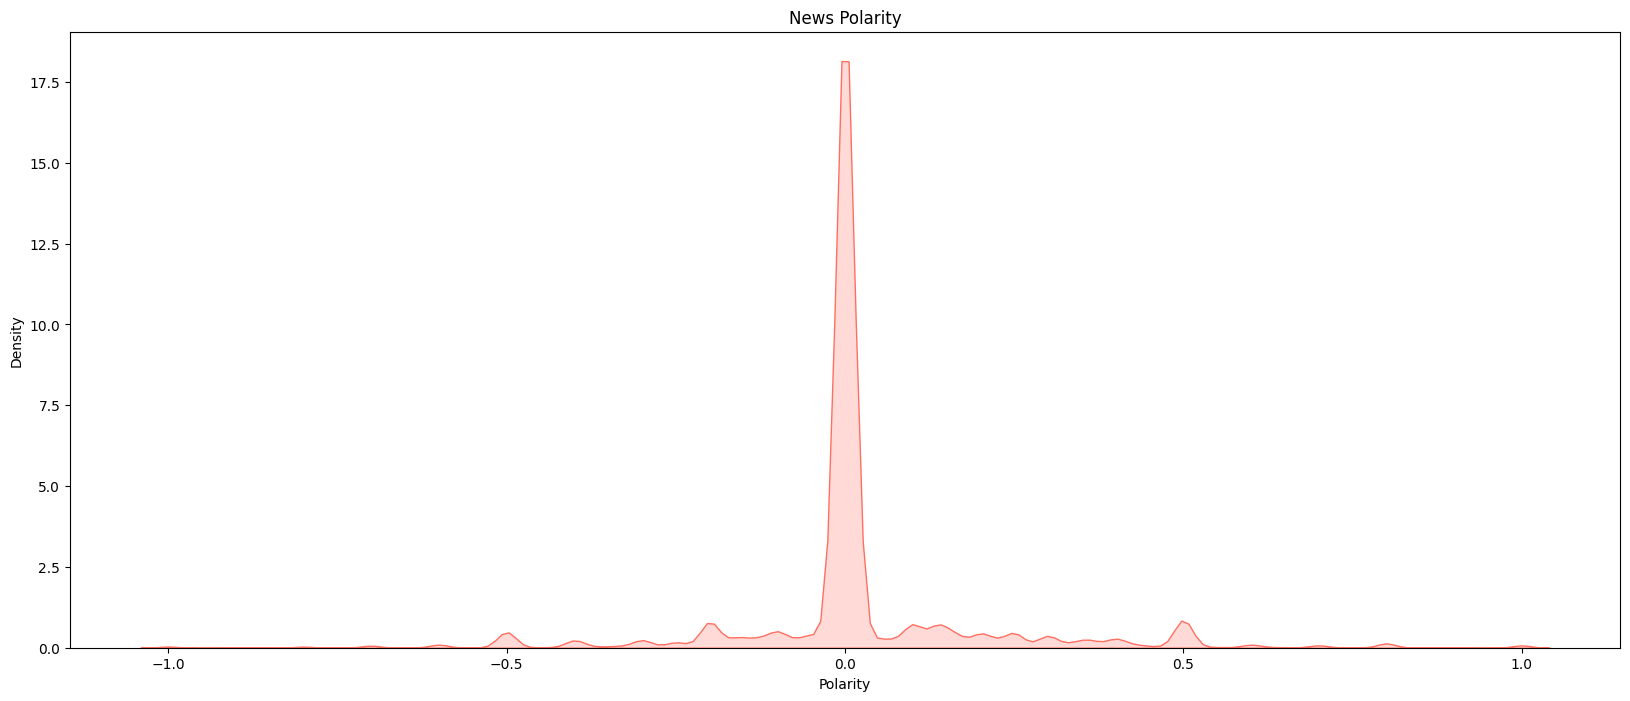

In [40]:
plt.figure(figsize=(20, 8))
plt.title('News Polarity')
sns.kdeplot(hybrid_dataset['Polarity'], color='#FF6F61', shade=True)
plt.show()

Visualize Subjectivity Distribution with KDE Plot

Purpose: Create a KDE plot to visualize the distribution of subjectivity scores in the news headlines.

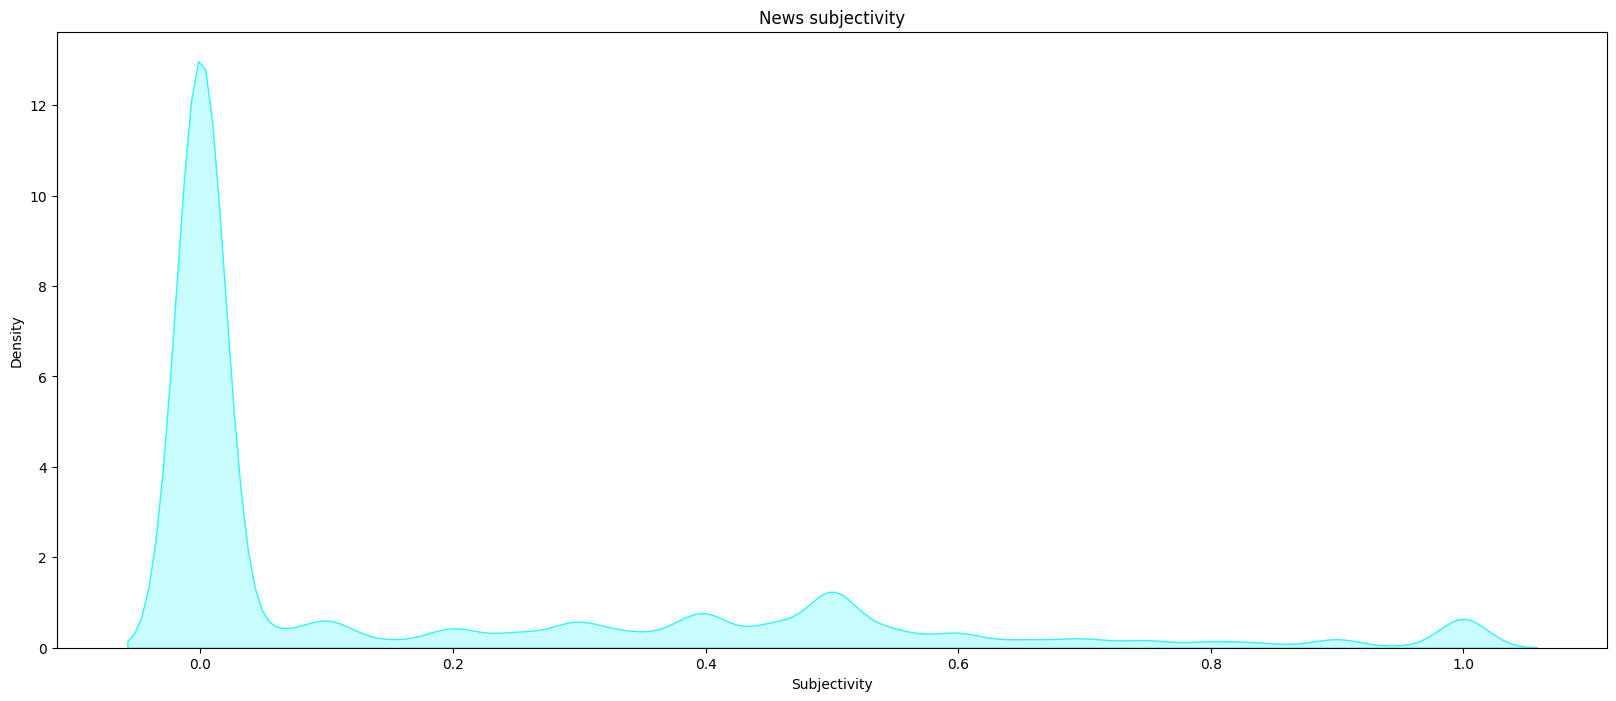

In [41]:
plt.figure(figsize=(20, 8))
plt.title('News subjectivity')
sns.kdeplot(hybrid_dataset['Subjectivity'], color='#2BF6F9', shade=True)
plt.show()

Perform Sentiment Analysis Using VADER

Purpose: Use the VADER sentiment analyzer to calculate the compound, negative, neutral, and positive sentiment scores for each news headline.

In [42]:
senti_int_an = SentimentIntensityAnalyzer()
hybrid_dataset['Compound'] = [senti_int_an.polarity_scores(v)['compound'] for v in hybrid_dataset['News']]
hybrid_dataset['Negative'] = [senti_int_an.polarity_scores(v)['neg'] for v in hybrid_dataset['News']]
hybrid_dataset['Neutral'] = [senti_int_an.polarity_scores(v)['neu'] for v in hybrid_dataset['News']]
hybrid_dataset['Positive'] = [senti_int_an.polarity_scores(v)['pos'] for v in hybrid_dataset['News']]
hybrid_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Category,News,sentiment,neutral,positive,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2017-03-01,26.01,26.379999,25.860001,25.9,24.324486,55900,life-style.relationships.man-woman,Beginner's guide to rocking sex,neutral,True,False,0.00,0.00,0.0000,0.000,1.000,0.000
1,2017-03-01,26.01,26.379999,25.860001,25.9,24.324486,55900,city.indore,With only 58 PUC centres; Indore fails to curb...,negative,False,False,0.65,-0.25,-0.4215,0.237,0.763,0.000
2,2017-03-01,26.01,26.379999,25.860001,25.9,24.324486,55900,entertainment.hindi.bollywood,You can't miss Sonakshi Sinha's underwater pic...,neutral,True,False,0.00,0.00,0.1139,0.000,0.806,0.194
3,2017-03-01,26.01,26.379999,25.860001,25.9,24.324486,55900,entertainment.tamil.movies.news,Cheran and Vijay Sethupathi to team up?,neutral,True,False,0.00,0.00,0.0000,0.000,1.000,0.000
4,2017-03-01,26.01,26.379999,25.860001,25.9,24.324486,55900,entertainment.tamil.movies.news,Sonia Aggarwal to play a cop in her next,neutral,True,False,0.00,0.00,0.3400,0.000,0.769,0.231


Select Relevant Columns for Modeling

Purpose: Define a list of relevant columns from the hybrid dataset to be used as features for machine learning modeling.

In [43]:
req_col = ['Open', 'High', 'Low', 'Volume', 'Compound', 'Negative', 'Neutral', 'Positive', 'positive']

Prepare the Final Dataset for Modeling

Purpose: Create a new DataFrame with the selected columns, reset the index, rename the positive column to Label, and remove any duplicate columns.

In [44]:
new_hybrid_dataset = hybrid_dataset[req_col]
new_hybrid_dataset.reset_index(inplace = True)
new_hybrid_dataset.rename(columns = {'positive':'Label'}, inplace = True)
new_hybrid_dataset = new_hybrid_dataset.loc[:,~new_hybrid_dataset.columns.duplicated()]


In [45]:
new_hybrid_dataset.head()

,index,Open,High,Low,Volume,Compound,Negative,Neutral,Positive,Label
0,0,26.01,26.379999,25.860001,55900,0.0000,0.000,1.000,0.000,False
1,1,26.01,26.379999,25.860001,55900,-0.4215,0.237,0.763,0.000,False
2,2,26.01,26.379999,25.860001,55900,0.1139,0.000,0.806,0.194,False
3,3,26.01,26.379999,25.860001,55900,0.0000,0.000,1.000,0.000,False
4,4,26.01,26.379999,25.860001,55900,0.3400,0.000,0.769,0.231,False


Split the Data into Training and Testing Sets

Purpose: Split the data into training and testing sets with a 70-30 split for training and evaluation of machine learning models.

In [46]:
X = new_hybrid_dataset.drop('Label', axis=1)    
y = new_hybrid_dataset['Label']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

Handle Missing Values in the Training and Testing Sets

Purpose: Check for missing values in the training and testing sets and fill them with the mean of the respective columns.

In [47]:
np.any(np.isnan(x_train))
np.all(np.isfinite(x_train))
x_train = x_train.fillna(x_train.mean())
x_test = x_test.fillna(x_test.mean())

Train and Evaluate Random Forest Classifier

In [48]:
randomforest = RandomForestClassifier(n_estimators=200)
randomforest.fit(x_train,y_train)
y_randomforest_pred = randomforest.predict(x_test)
accuracy_rf= accuracy_score(y_test,y_randomforest_pred)

Train and Evaluate Decision Tree Classifier

In [49]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_dt_pred = decisiontree.predict(x_test)
accuracy_dt = accuracy_score(y_test,y_dt_pred)

Train and Evaluate Gradient Boosting Classifier

In [51]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_gb_pred = gb.predict(x_test)
accuracy_gb= accuracy_score(y_test,y_gb_pred)

 Train and Evaluate AdaBoost Classifier

In [52]:
adaboost = AdaBoostClassifier()
adaboost.fit(x_train, y_train)
y_adaboost_pred = adaboost.predict(x_test)
accuracy_ab = accuracy_score(y_test,y_adaboost_pred)

Train and Evaluate XGBoost Classifier

In [54]:
xgboost = XGBClassifier()
xgboost.fit(x_train, y_train)
y_xgb_pred = xgboost.predict(x_test)
accuracy_xgb = accuracy_score(y_test, y_xgb_pred)
print(accuracy_xgb)

0.8255063122384392


 Compare Model Accuracies

In [64]:
model_accuracies = {
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf,
    'AdaBoost': accuracy_ab,
    'Gradient Boosting': accuracy_gb,
    'xgboost': accuracy_xgb
}



Creating a Bar Plot to Compare Model Accuracies

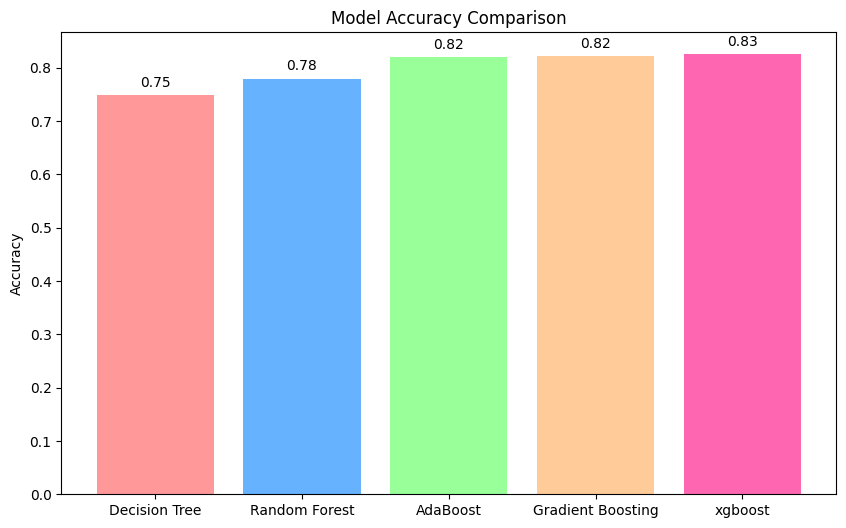

In [63]:
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['#FF9999','#66B2FF','#99FF99','#FFCC99','#FF66B2'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

Conclusion: The xgboost model gives us the best accuracy of 83%. which is not excellent because we have limited data of stockprices  